https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download

Attribute Information:
1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib inline

In [3]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
#Ознайомимось з нашою цільовою змінною

# print(data['stroke'].unique())
data['stroke'].value_counts(dropna=False)

0    4861
1     249
Name: stroke, dtype: int64

In [7]:
def correl_group(group1, group2):
    return np.round(len(group1) / len(group2)*100, 2)

In [9]:
#перетворюємо данні в числові для подальшої роботи
#1. data['gender'] стать перетворюємо жінки, інші = 0 ; чоловіки =1 
#(інші == жінки, адже жінок більше у вибірці, більша ймовірність що та особа саме тієї статі)
data['Int_Gender'] = np.where(data['gender'] == 'Male', 1, 0)

#2 data['ever_married'] Чи був колись одружений? перетворюєм в числові Так == 1; Ні == 0
data['Int_Ever_Married'] = np.where(data['ever_married'] == 'Yes', 1, 0) 

#4 data['Residence_type'] місце проживання місто == 0, село == 1
data['Residence_type'] = np.where(data['Residence_type'] == 'Rural', 1, 0)

In [10]:
# data['Residence_type'].value_counts(dropna=False)

In [11]:
#3.1 групування data['work_type'] 1 - самозайнятий; 2 - працює на когось; 0 - не працював ніколи
def func3_1(elem):
    if elem == 'Self-employed':
        return 1
    if elem == 'Private' or elem == 'Govt_job':
        return 2
    else:
        return 0

In [12]:
data['Int_Work_type1'] = data['work_type'].apply(func3_1)
data['Int_Work_type1'].value_counts(dropna=False)

2    3582
1     819
0     709
Name: Int_Work_type1, dtype: int64

In [13]:
#3.2 групування data['work_type'] 0 == Never_worked + children; 1 == Govt_job; 2 == Private + Self-employed
def func3_2(elem):
    if elem == 'Govt_job':
        return 1
    if elem == 'Private' or elem == 'Self-employed':
        return 2
    else:
        return 0

In [14]:
data['Int_Work_type2'] = data['work_type'].apply(func3_2)
data['Int_Work_type2'].value_counts(dropna=False)

2    3744
0     709
1     657
Name: Int_Work_type2, dtype: int64

In [15]:
#3.3 групування data['work_type'] 0 == Never_worked + children; 1 == Govt_job; 2 == Private + Self-employed
def func3_3(elem):
    if elem == 'Govt_job':
        return 0
    if elem == 'Private':
        return 1
    if elem == 'Self-employed':
        return 2
    else:
        return -1

In [16]:
data['Int_Work_type3'] = data['work_type'].apply(func3_3)
data['Int_Work_type3'].value_counts(dropna=False)

 1    2925
 2     819
-1     709
 0     657
Name: Int_Work_type3, dtype: int64

In [17]:
#5 data['smoking_status'] Згідно данних ВООЗ в світі близько 13 % курців це відповідає тій кількості курців що є відомою,
# тому осіб що не вказали про себе можна важати - не курцями
# formerly smoked + smokes Не курець == 0; Курець == 1

def func5(elem):
    if elem == 'never smoked' or elem == 'Unknown':
        return 0
    else:
        return 1

In [18]:
data['Int_Smoking_status'] = data['smoking_status'].apply(func5)
data['Int_Smoking_status'].value_counts(dropna=False)

0    3436
1    1674
Name: Int_Smoking_status, dtype: int64

In [20]:
# data.columns

In [22]:
#приберем зайві колонки для побудови карти кореляцій
data_modif = data[['stroke', 'age', 'hypertension', 'heart_disease', 'Residence_type', 'avg_glucose_level', 'bmi', 'Int_Gender', 
        'Int_Ever_Married', 'Int_Smoking_status', 'Int_Work_type3']].copy()

In [23]:
data_modif

,stroke,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,Int_Gender,Int_Ever_Married,Int_Smoking_status,Int_Work_type3
0,1,67.0,0,1,0,228.69,36.6,1,1,1,1
1,1,61.0,0,0,1,202.21,NaN,0,1,0,2
2,1,80.0,0,1,1,105.92,32.5,1,1,0,1
3,1,49.0,0,0,0,171.23,34.4,0,1,1,1
4,1,79.0,1,0,1,174.12,24.0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,0,83.75,NaN,0,1,0,1
5106,0,81.0,0,0,0,125.20,40.0,0,1,0,2
5107,0,35.0,0,0,1,82.99,30.6,0,1,0,2
5108,0,51.0,0,0,1,166.29,25.6,1,1,1,1


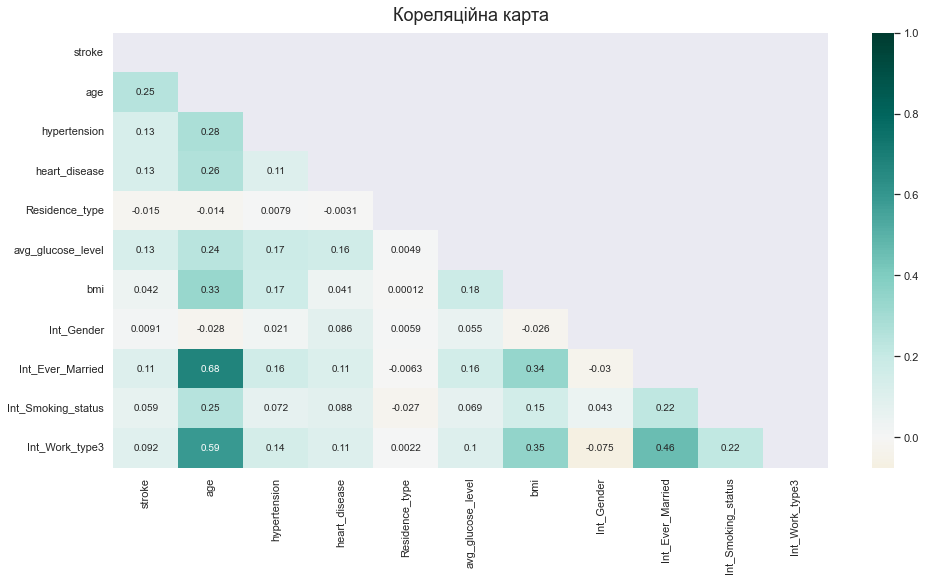

In [24]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(16,8))
    
    mask = np.triu(np.ones_like(correlations, dtype=bool))
    
    
    heatmap = sns.heatmap(correlations, mask=mask, vmax=1, center=0, annot=True, cmap='BrBG')
    heatmap.set_title('Кореляційна карта', fontdict={'fontsize':18}, pad=12);
    
    plt.show();
    
correlation_heatmap(data_modif)

# Дослідження впливу віку на ймовірність інсульту

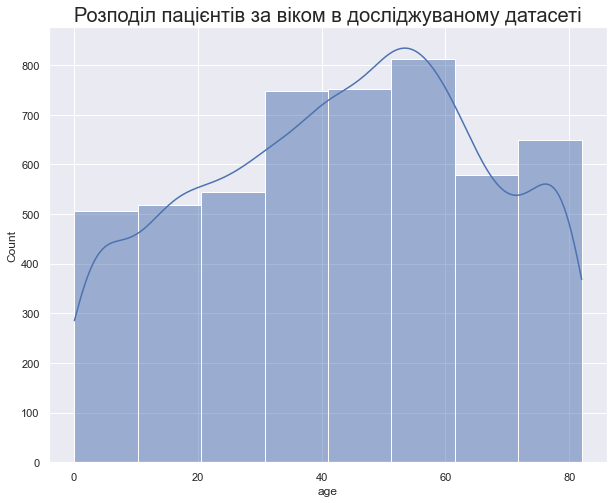

In [25]:
fig, axes = plt.subplots(sharey=True, figsize=(10, 8))

sns.histplot(data_modif['age'], kde=True, bins=8)
# sns.distplot(data_modif['age'], kde=True)


axes.set_title('Розподіл пацієнтів за віком в досліджуваному датасеті', fontsize=20)

plt.show()

In [33]:
age_max = data_modif['age'].max()
age_min =data_modif['age'].min()
print(f'в досліджуваному датасеті представлені пацієнти віком від {age_min} до {age_max} років.')

в досліджуваному датасеті представлені пацієнти віком від 0.08 до 82.0 років.


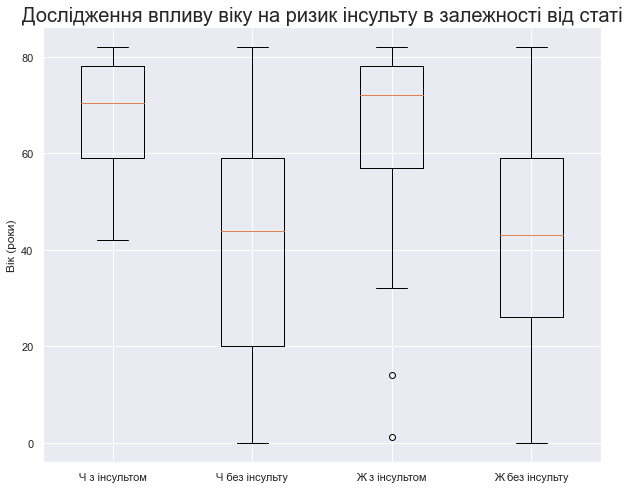

,stroke,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,Int_Gender,Int_Ever_Married,Int_Smoking_status,Int_Work_type3
162,1,1.32,0,0,0,70.37,NaN,0,0,0,-1
245,1,14.00,0,0,1,57.93,30.9,0,0,0,-1


In [38]:
fig, ax = plt.subplots(figsize=(10, 8))

Men1 = data_modif[(data_modif['stroke'] == 1)&(data_modif['Int_Gender'] == 1)]['age']
Men0 = data_modif[(data_modif['stroke'] == 0)&(data_modif['Int_Gender'] == 1)]['age']
Women1 = data_modif[(data_modif['stroke'] == 1)&(data_modif['Int_Gender'] == 0)]['age']
Women0 = data_modif[(data_modif['stroke'] == 0)&(data_modif['Int_Gender'] == 0)]['age']

ax.boxplot([Men1, Men0, Women1, Women0])
ax.set_xticklabels(["Ч з інсультом", "Ч без інсульту","Ж з інсультом","Ж без інсульту"])
ax.set_ylabel("Вік (роки)")

ax.set_title('Дослідження впливу віку на ризик інсульту в залежності від статі', fontsize=20)
plt.show()

data_modif[(data_modif['stroke'] == 1) & (data_modif['Int_Gender'] == 0) & (data_modif['age'] < 20)]

Знайдені дві особи - є аномальними. Можливо вони мали вроджені захворювання, що не були передбачені в опитуванні при підготовці датасету

(ГіПТЕЗА)Без врахування аномальних точок, можна припустити що у жінок раніше виникає інсульт

In [40]:
#Після побудови графіка ми можемо спостерігати нерівномірний розподіл

A = data_modif[(data_modif['age'] < 25) & (data_modif['stroke'] == 1)]
A1 = data_modif[(data_modif['age'] < 65) & (data_modif['stroke'] == 1)]
A2 = data_modif[(data_modif['age'] > 65) & (data_modif['stroke'] == 1)]
B = data_modif[data_modif['stroke'] == 1]

C = np.round(len(A2)/ len(B) * 100, 2)
C1 = np.round(len(A1)/ len(B) * 100, 2) - np.round(len(A)/ len(B) * 100, 2)
C2 = 100 - C - C1
print(f'{C}% випадків інсульту припадає на пацієнтів старших за 65 років;')
print(f'{C1}% припадає на пацієнтів від 25 до 65 років;')
print(f'та менше {np.round(C2, 0)}% на пацієнтів до 25 років.')
print()
print(f'Отримані данні є периконливим аргументом того що вік(вікові зміни) є однією з причин інсульту')

62.65% випадків інсульту припадає на пацієнтів старших за 65 років;
35.34% припадає на пацієнтів від 25 до 65 років;
та менше 2.0% на пацієнтів до 25 років.

Отримані данні є периконливим аргументом того що вік(вікові зміни) є однією з причин інсульту


# Дослідження впливу bmi(індексу маси тіла) на ймовірність інсульту

ІМТ 25,0 або більше означає надмірну вагу, тоді як здоровий діапазон становить від 18,5 до 24,9. 
ІМТ відноситься до більшості дорослих 18-65 років.(некореткно враховувати ІМТ для дітей що не завершили свій розвиток, вагітних, спортсменів тощо.) Для дослідження візьмомо ширші рамки: пацієнти віком від 16 до 70 років

In [42]:
#для зручності роботи створемо окрему таблицю де будуть стовпці ['stroke', 'age', 'bmi'], та пацієнти віком від 16 до 70 років
#також видалимо всі Nan
data_for_bmi = data[['stroke', 'age', 'bmi', 'Int_Gender']].copy()
data_for_bmi2 = data_for_bmi[(data_for_bmi['age']> 15) & (data_for_bmi['age']< 71)]
data_for_bmi2 = data_for_bmi2.fillna(0)
data_for_bmi3 = data_for_bmi2[(data_for_bmi2['bmi'] > 5) & (data_for_bmi2['bmi'] < 70)]

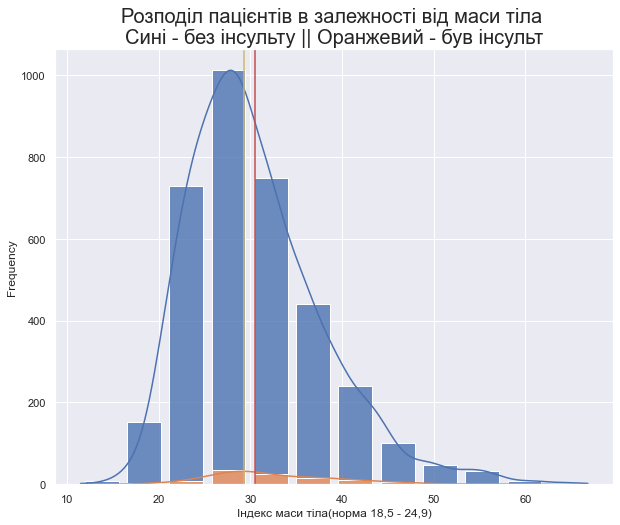

In [45]:
fig, axes = plt.subplots(figsize=(10, 8))


sns.histplot(data=data_for_bmi3, x="bmi", hue="stroke", shrink=.8, alpha=.8, bins = 12, kde=True, multiple="stack", legend=False)

plt.axvline(data_for_bmi3['bmi'].mean(), 0, c='r')
plt.axvline(data_for_bmi3['bmi'].median(), 0, c='y')

axes.set_title('Розподіл пацієнтів в залежності від маси тіла \nСині - без інсульту || Оранжевий - був інсульт', fontsize=20)
axes.set(xlabel='Індекс маси тіла(норма 18,5 - 24,9)', ylabel='Frequency')

plt.show()


In [27]:
# окремий графік: Розподіл пацієнтів з інсультом в залежності від маси тіла
    
# fig, axes = plt.subplots(figsize=(10, 6))

# data=data_for_bmi3[data_for_bmi3['stroke']== 1]

# sns.histplot(data=data, x="bmi", hue="stroke", shrink=.8, alpha=.8, bins = 12, kde=True, legend=False, color='purple')

# plt.axvline(data_for_bmi3['bmi'].mean(), 0, c='r')
# plt.axvline(data_for_bmi3['bmi'].median(), 0, c='y')
# plt.axvline(24.9, 0, c='k')

# axes.set_title('Розподіл пацієнтів з інсультом в залежності від маси тіла', fontsize=20)
# axes.set(xlabel='Індекс маси тіла(норма 18,5 - 24,9)', ylabel='Frequency')

# plt.show()

In [28]:
#Бачимо майже нормальний розподіл з невеликим зміщенням праворуч, перевіримо це визначивше коефіцієнт асиметрії та куртозис
print('Визначення коефіцієнту асиметрії: ' + str(np.round(data_for_bmi3['bmi'].skew(), 3)))
print()
# Дослідження куртозису
print('Визначення куртозису: ' + str(np.round(data_for_bmi3['bmi'].kurtosis(), 3)))


Визначення коефіцієнту асиметрії: 1.011

Визначення куртозису: 1.496


З отриманих данних, видно що вони розподілені нормально без великих хвостів, один з показників чесності данних.
Розташування медіани та середнього значення світчить про невелике зміщення данних, можливо викликано тим що більша кількість пацієнтів що досліджувались мали проблеми з зайвою вагою.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


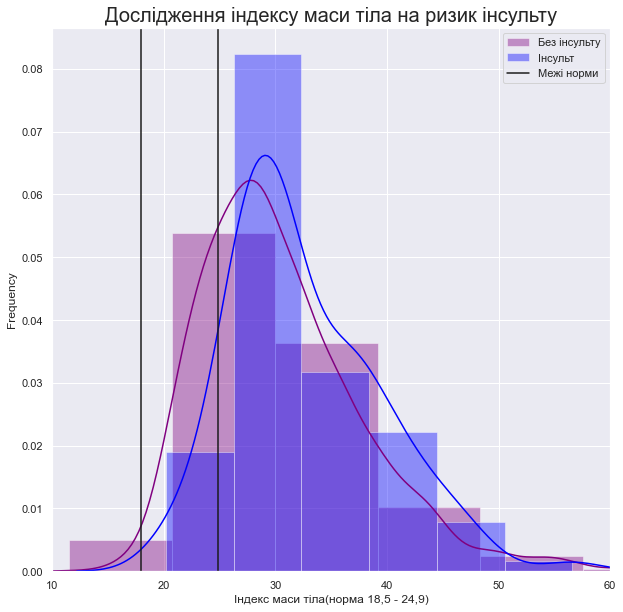

In [29]:
f, ax = plt.subplots(figsize=(10, 10))

a = 6

sns.distplot(data_for_bmi3[data_for_bmi3['stroke'] == 0]['bmi'], bins=a, label='Без інсульту', color='purple')
sns.distplot(data_for_bmi3[data_for_bmi3['stroke'] ==1]['bmi'], bins=a, label='Інсульт', color='blue')


plt.axvline(18,5, 0, c='k', label='Межі норми')
plt.axvline(24.9, 0, c='k')

ax.set_title('Дослідження індексу маси тіла на ризик інсульту', fontsize=20)
ax.set(xlabel='Індекс маси тіла(норма 18,5 - 24,9)', ylabel='Frequency')
ax.set_xlim([10, 60])

ax.legend()

In [30]:
K1 = data_for_bmi3[(data_for_bmi3['stroke'] ==1) & (data_for_bmi3['bmi'] > 25)]
K2 =data_for_bmi3[data_for_bmi3['stroke'] ==1]
res = np.round(len(K1)/len(K2)*100, 2)

S1 =data_for_bmi3[(data_for_bmi3['stroke'] ==0) & (data_for_bmi3['bmi'] < 25)]
S2 = data_for_bmi3[data_for_bmi3['stroke'] ==0]
res2 =np.round(len(S1)/len(S2)*100, 2)
print(f'Отриманий графік демонструє а розрахунки підтверджують, що понад')
print(f'{res}% людей що перенесли інсульт мали проблеми з надлишковою вагою,')
print(f'у той же час лише {res2}% людей що не мали інсульту мали нормальну вагу.')
print()
print('Підсумовуючи зайва вага безперечно впливає на ризик виникнення інсульту.')


Отриманий графік демонструє а розрахунки підтверджують, що понад
92.31% людей що перенесли інсульт мали проблеми з надлишковою вагою,
у той же час лише 23.5% людей що не мали інсульту мали нормальну вагу.

Підсумовуючи зайва вага безперечно впливає на ризик виникнення інсульту.


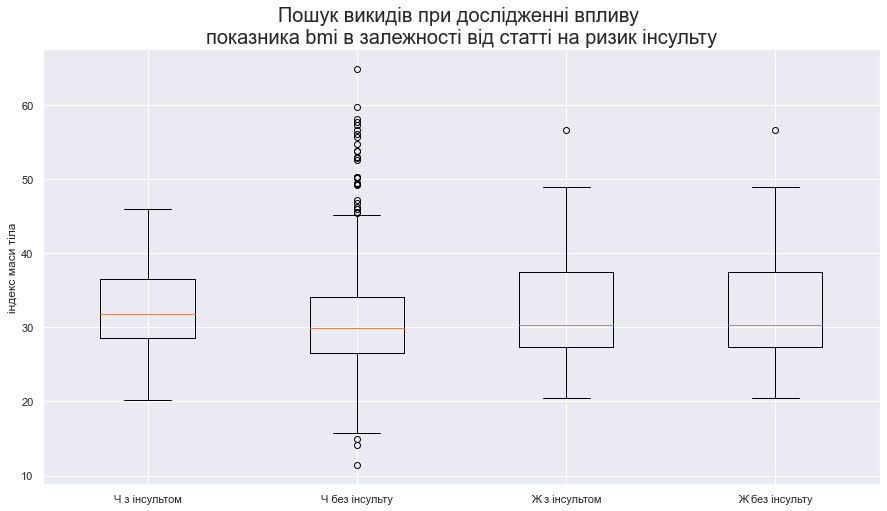

Зафіксована 201 людина з невказаним індексом маси тіла 
 було виявлено  32 викидa

Зафіксовано 7 супер аномалій


In [48]:
fig, ax = plt.subplots(figsize=(15, 8))
data_for_bmi4 = data_for_bmi3

Men1 = data_for_bmi4[(data_for_bmi4['stroke'] == 1)&(data_for_bmi4['Int_Gender'] == 1)]['bmi']
Men0 = data_for_bmi4[(data_for_bmi4['stroke'] == 0)&(data_for_bmi4['Int_Gender'] == 1)]['bmi']
Women1 = data_for_bmi4[(data_for_bmi4['stroke'] == 1)&(data_for_bmi4['Int_Gender'] == 0)]['bmi']
Women0 = data_for_bmi4[(data_for_bmi4['stroke'] == 0)&(data_for_bmi4['Int_Gender'] == 0)]['bmi']



ax.boxplot([Men1, Men0, Women1, Women1])
ax.set_xticklabels(["Ч з інсультом", "Ч без інсульту","Ж з інсультом","Ж без інсульту"])
ax.set_ylabel("індекс маси тіла")

ax.set_title('Пошук викидів при дослідженні впливу \nпоказника bmi в залежності від статті на ризик інсульту', fontsize=20)
plt.show()

print(f'Зафіксована 201 людина з невказаним індексом маси тіла ')

sp = [Men1, Men0, Women1, Women1]
summa = 0
for i in range(len(sp)):
    
    Q1 = sp[i].quantile(0.25)
    Q3 = sp[i].quantile(0.75)
    IQR = Q3 - Q1

    filter =(sp[i]>=(Q1 - 1.5 * IQR))&(sp[i]<=(Q3 + 1.5 * IQR))
    summa +=len(sp[i]) - len(sp[i].loc[filter])
print(f' було виявлено  {summa} викидa')
print()
print(f'Зафіксовано 7 супер аномалій')
# A =data_for_bmi4[(data_for_bmi4['stroke'] == 0)&(data_for_bmi4['Int_Gender'] == 1)& (data_for_bmi4['bmi'] < 15.5)]
# B= data_for_bmi4[(data_for_bmi4['stroke'] == 0)&(data_for_bmi4['Int_Gender'] == 1)& (data_for_bmi4['bmi'] > 59)]
# C =data_for_bmi4[(data_for_bmi4['stroke'] == 1)&(data_for_bmi4['Int_Gender'] == 0)& (data_for_bmi4['bmi'] > 55)]
# D= data_for_bmi4[(data_for_bmi4['stroke'] == 0)&(data_for_bmi4['Int_Gender'] == 0)& (data_for_bmi4['bmi'] > 55)]

# pd.concat([A, B, C, D])

In [32]:
data_for_bmi4[(data_for_bmi4['Int_Gender'] == 1)]['bmi'].describe()

count    1365.000000
mean       30.793187
std         6.368011
min        11.500000
25%        26.500000
50%        30.000000
75%        34.300000
max        64.800000
Name: bmi, dtype: float64

In [33]:
data_for_bmi4[(data_for_bmi4['Int_Gender'] == 0)]['bmi'].describe()

count    2160.000000
mean       30.411296
std         7.937550
min        14.100000
25%        24.575000
50%        28.700000
75%        34.700000
max        66.800000
Name: bmi, dtype: float64

Візуально можна припустити що жінки мають більші показники BMI, але якщо ми глянемо на цифри не побачим принципової різниці

# Дослідження впливу рівня глюкози на ризик інсульту

 переведем значення 'avg_glucose_level' з мг/дЛ в інші одиниці виміру в ммоль/Л

In [49]:
#створимо малу таблицую для зручнішої роботи
data_for_gluc = data[['stroke', 'age', 'bmi', 'avg_glucose_level', 'Int_Gender']].copy()
data_for_gluc['avg_glucose_level'] = np.round(data_for_gluc['avg_glucose_level'] / 18, 2)

In [50]:
# розподіл пацієнтів з нормальним рівнем глюкози на наявність інсульту
norm_gluc_1 = data_for_gluc[(data_for_gluc['stroke'] == 1) & (data_for_gluc['avg_glucose_level'] < 8)]
norm_gluc_0 = data_for_gluc[(data_for_gluc['stroke'] == 0) & (data_for_gluc['avg_glucose_level'] < 8)]
#кількість людей у відповідних групах
Norm_1= len(norm_gluc_1)
Norm_0= len(norm_gluc_0)
# % людей з діабетом в досліджуваній групі
Norm = np.round(Norm_1/ Norm_0*100, 0)

# розподіл пацієнтів з діабетним рівнем глюкози на наявність інсульту
diab_gluc_1 = data_for_gluc[(data_for_gluc['stroke'] == 1) & (data_for_gluc['avg_glucose_level'] > 10.9)]
diab_gluc_0 = data_for_gluc[(data_for_gluc['stroke'] == 0) & (data_for_gluc['avg_glucose_level'] > 10.9)]
#кількість людей у відповідних групах
Diab_1= len(diab_gluc_1)
Diab_0= len(diab_gluc_0)
# % людей з діабетом в досліджуваній групі
Diab= np.round(Diab_1/ Diab_0*100, 1)

# розподіл пацієнтів з перед діабетним рівнем глюкози на наявність інсульту
not_norm_gluc_1 = data_for_gluc[(data_for_gluc['stroke'] == 1) & (data_for_gluc['avg_glucose_level'] > 8)] - diab_gluc_1
not_norm_gluc_0 = data_for_gluc[(data_for_gluc['stroke'] == 0) & (data_for_gluc['avg_glucose_level'] > 8)] - diab_gluc_0
#кількість людей у відповідних групах
not_Norm_1= len(not_norm_gluc_1)
not_Norm_0= len(not_norm_gluc_0)
# % людей з діабетом в досліджуваній групі
not_Norm = np.round(not_Norm_1/ not_Norm_0*100, 1)




print(f'Серед досліджених осіб що мали нормальний рівень цукру в крові, лише {Norm}% перенесли інсульт,')
print(f'серед пацієнтів з перед діабетним станом було зафіксовано {not_Norm}%,')
print(f'майже така сама кількість людей мала інсульт {Diab}%, серед пацієнтів з цукровим діабетом.')
print()
print(f'Отримані дані дозволяють стверджувати - наявність цукру вище норми +10 % до ризику інсульту.')

Серед досліджених осіб що мали нормальний рівень цукру в крові, лише 4.0% перенесли інсульт,
серед пацієнтів з перед діабетним станом було зафіксовано 13.2%,
майже така сама кількість людей мала інсульт 15.3%, серед пацієнтів з цукровим діабетом.

Отримані дані дозволяють стверджувати - наявність цукру вище норми +10 % до ризику інсульту.


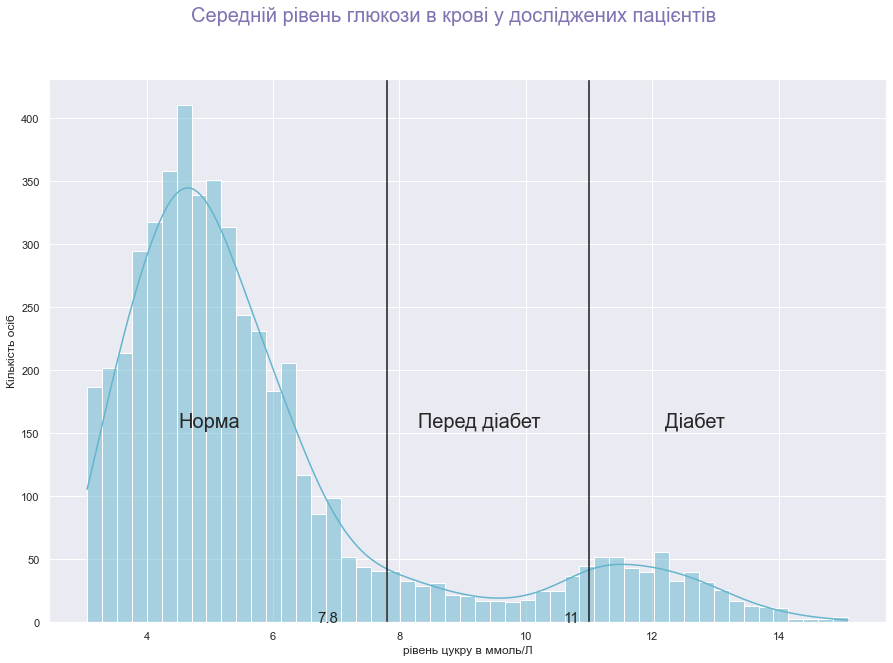

In [36]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.suptitle('Середній рівень глюкози в крові у досліджених пацієнтів', color='m', fontsize=20)

sns.histplot(data_for_gluc['avg_glucose_level'], kde=True,  color='c')


plt.text(4.5, 155, 'Норма', fontsize=20)
plt.text(8.3, 155, 'Перед діабет', fontsize=20)
plt.text(12.2, 155, 'Діабет', fontsize=20)
plt.text(6.7, 0, '7.8', fontsize=15)
plt.text(10.6, 0, '11', fontsize=15)

ax.set(xlabel='рівень цукру в ммоль/Л', ylabel='Кількість осіб')

plt.axvline(7.8, 0, c='k')
plt.axvline(11, 0, c='k')

# ax2 = ax.twinx()
# ax2.plot([3, 7.8, 11, 14], [4, 4, 13, 15], color="r")
# ax2.set_ylim([0, 35])

plt.show()

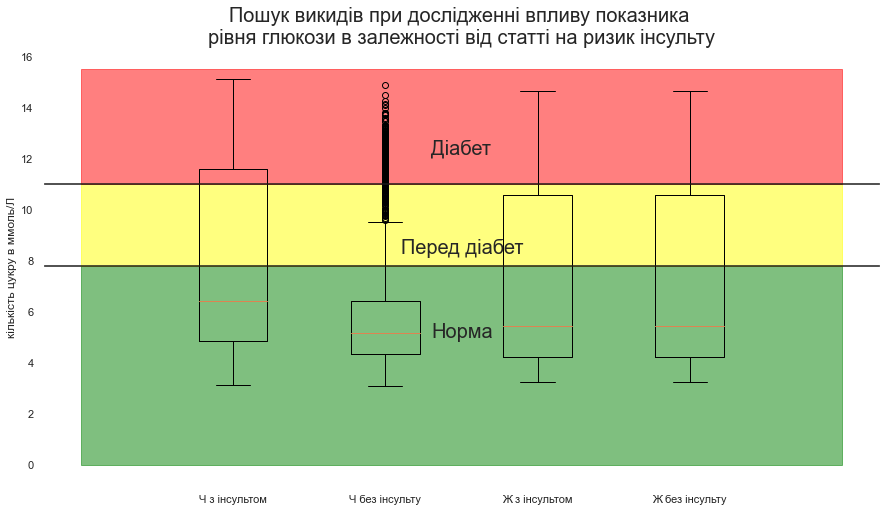

 було виявлено  251 викидa в групі чоловіків без інсульту, серед 2007


In [53]:
fig, ax = plt.subplots(figsize=(15, 8))

Men1 = data_for_gluc[(data_for_gluc['stroke'] == 1)&(data_for_gluc['Int_Gender'] == 1)]['avg_glucose_level']
Men0 = data_for_gluc[(data_for_gluc['stroke'] == 0)&(data_for_gluc['Int_Gender'] == 1)]['avg_glucose_level']
Women1 = data_for_gluc[(data_for_gluc['stroke'] == 1)&(data_for_gluc['Int_Gender'] == 0)]['avg_glucose_level']
Women0 = data_for_gluc[(data_for_gluc['stroke'] == 0)&(data_for_gluc['Int_Gender'] == 0)]['avg_glucose_level']

ax.boxplot([Men1, Men0, Women1, Women1])
ax.set_xticklabels(["Ч з інсультом", "Ч без інсульту","Ж з інсультом","Ж без інсульту"])
ax.set_ylabel("кількість цукру в ммоль/Л")

plt.axhline(7.8, 0, c='k')
plt.axhline(11, 0, c='k')
plt.text(2.3, 5, 'Норма', fontsize=20)
plt.text(2.1, 8.3, 'Перед діабет', fontsize=20)
plt.text(2.3, 12.2, 'Діабет', fontsize=20)
 
x0=np.array([0, 5])
y0=np.array([7.8, 7.8])
y1=np.array([11, 11])
y2=np.array([15.5, 15.5])
plt.fill_between(x0, y0, np.zeros_like(y0), color='green', alpha = 0.5)
plt.fill_between(x0, y0, y1, color='yellow', alpha = 0.5)
plt.fill_between(x0, y1, y2, color='red', alpha = 0.5)
# , alpha = 0.3
ax.set(facecolor = 'w', alpha = 0.1)

ax.set_title('Пошук викидів при дослідженні впливу показника \nрівня глюкози в залежності від статті на ризик інсульту', fontsize=20)
plt.show()

sp = [Men0]
summa = 0
for i in range(len(sp)):
    
    Q1 = sp[i].quantile(0.25)
    Q3 = sp[i].quantile(0.75)
    IQR = Q3 - Q1

    filter =(sp[i]>=(Q1 - 1.5 * IQR))&(sp[i]<=(Q3 + 1.5 * IQR))
    summa +=len(sp[i]) - len(sp[i].loc[filter])
print(f' було виявлено  {summa} викидa в групі чоловіків без інсульту, серед {len(Men0)}')

In [38]:
# Men_qw = data_for_gluc[(data_for_gluc['stroke'] == 0)&(data_for_gluc['Int_Gender'] == 1)&(data_for_gluc['avg_glucose_level'])>13]

Men0.describe()

count    2007.000000
mean        5.958610
std         2.541863
min         3.070000
25%         4.340000
50%         5.160000
75%         6.420000
max        14.870000
Name: avg_glucose_level, dtype: float64

In [54]:
People_gl = data_for_gluc[data_for_gluc['avg_glucose_level']>12]

print(f'кожен {np.round(len(data)/len(People_gl))} досліджений пацієнт має цукровий діабет')

кожен 20.0 досліджений пацієнт має цукровий діабет


# Дослідимо інші фактори що можуть впливати на виникнення інсульту

1)Дослідження параметру шлюбу

Доцільно перевіряти вплив фактору шлюб - сімейне життя, лише з повнолітніми особами, тобто дослідимо лише осіб старших за 20 років

In [41]:
Mar_st_1 = data[(data['age'] > 20)&(data['ever_married'] == 'Yes')&(data['stroke'] == 1)]
Mar_summa = data[(data['age'] > 20)&(data['ever_married'] == 'Yes')]
#визначимо співідношення осіб що мають інсульт серед всіх одружених
res0 = np.round(len(Mar_st_1)/len(Mar_summa) * 100, 1)
#визначимо співідношення чоловіків що мають інсульт серед всіх одружених
Mar_st_1_Male = data[(data['age'] > 20)&(data['ever_married'] == 'Yes')&(data['stroke'] == 1)&(data['gender'] == "Male")]
res0_1 = np.round(len(Mar_st_1_Male)/len(Mar_st_1) * 100, 1)

Unmar_st_1 = data[(data['age'] > 20)&(data['ever_married'] == 'No')&(data['stroke'] == 1)]
Unmar_summa = data[(data['age'] > 20)&(data['ever_married'] == 'No')]
#визначимо співідношення осіб що мають інсульт серед всіх не одружених
res1 = np.round(len(Unmar_st_1)/len(Unmar_summa) * 100, 1)

#визначимо співідношення чоловіків що мають інсульт серед всіх не одружених
Unmar_st_1_Male = data[(data['age'] > 20)&(data['ever_married'] == 'No')&(data['stroke'] == 1)&(data['gender'] == "Male")]
res1_1 = np.round(len(Unmar_st_1_Male)/len(Unmar_st_1) * 100, 1)

print(f'Отримані розрахунки свідчать, що серед людей у шлюбі, мали інсульт {res0}% осіб; проти {res1}% серед самотніх осіб.')
print()
print(f'Серед одружених осіб інсульт розподілений незалежно від статі(у {res0_1}% випадків серед одружених чоловіків),')
print(f'натамість серед ніколи не одружених осіб, інфаркт частіше виникав у жінок {100 - res1_1}% всіх випадків.')

Отримані розрахунки свідчать, що серед людей у шлюбі, мали інсульт 6.6% осіб; проти 3.7% серед самотніх осіб.

Серед одружених осіб інсульт розподілений незалежно від статі(у 45.5% випадків серед одружених чоловіків),
натамість серед ніколи не одружених осіб, інфаркт частіше виникав у жінок 70.4% всіх випадків.


2)Дослідження параметру статі

In [42]:

Gender_str_1 = data_modif[(data_modif['Int_Gender'] == 1)&(data_modif['stroke'] == 1)]
Gender_summa = data_modif[(data_modif['stroke'] == 1)]
res = np.round(len(Gender_str_1) / len(Gender_summa) * 100, 2)
print(f'Отримані результати вказують на те, що загалом чоловіки мають менший шанс інсульту {res}%, серед досліджуваних осіб.')

Отримані результати вказують на те, що загалом чоловіки мають менший шанс інсульту 43.37%, серед досліджуваних осіб.


3)Дослідження впливу місцевості проживання

In [43]:
Residence_type_1 = data_modif[(data_modif['Residence_type'] == 0)&(data_modif['stroke'] == 1)]
Residence_type_summa = data_modif[(data_modif['stroke'] == 1)]
res = np.round(len(Residence_type_1) / len(Residence_type_summa) * 100, 2)
print(f'Місце проживання не чинить значного впливу на ймовірність інсульту.\n({res}% серед всіх досліджених випадків інсульту стається в місті)')


Місце проживання не чинить значного впливу на ймовірність інсульту.
(54.22% серед всіх досліджених випадків інсульту стається в місті)


4) Дослідження впливу роботи

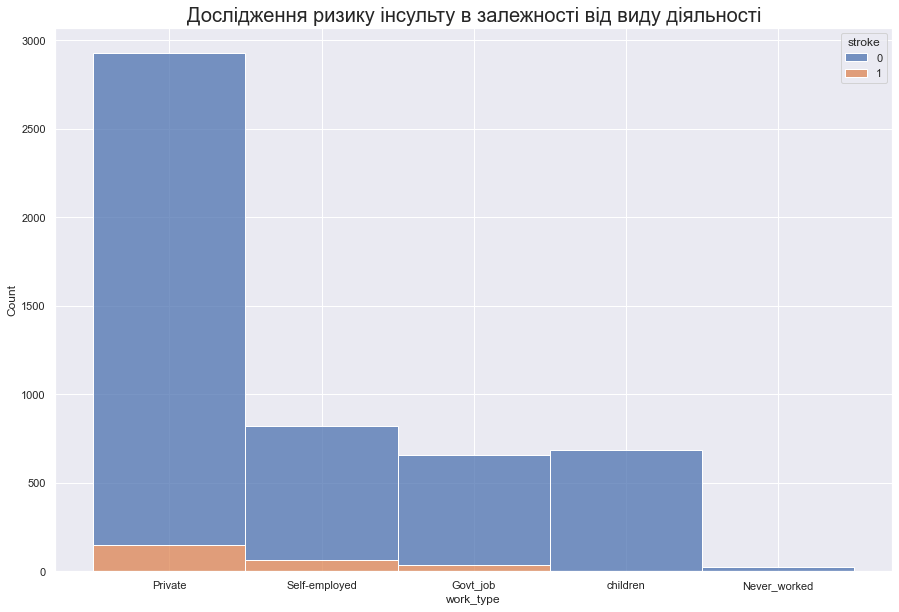

In [44]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_title('Дослідження ризику інсульту в залежності від виду діяльності', fontsize=20)
# sns.histplot(data = data, x= 'work_type', hue = 'stroke')
sns.histplot(data=data, x="work_type", hue="stroke", multiple="stack")
plt.show()

In [45]:
#співідношення людей з інсультом серед 'Private'
Prvt_st1 = data[(data['work_type'] == 'Private')&(data['stroke'] == 1)]
Prvt_summ = data[(data['work_type'] == 'Private')]
Prvt_res = correl_group(Prvt_st1, Prvt_summ)

#співідношення людей з інсультом серед "Govt_jov"
Govt_jov_st1 = data[(data['Int_Work_type3'] == 0)&(data['stroke'] == 1)]
Govt_jov_summ = data[(data['Int_Work_type3'] == 0)]
Govt_jov_res = correl_group(Govt_jov_st1, Govt_jov_summ)

#співідношення людей з інсультом серед 'Self-employed'
Self_empl_st1 = data[(data['work_type'] == 'Self-employed')&(data['stroke'] == 1)]
Self_empl_summ = data[(data['work_type'] == 'Self-employed')]
Self_empl_res = correl_group(Self_empl_st1, Self_empl_summ)

#співідношення людей з інсультом серед тих хто непрацював
Else_st1=data[(data['stroke'] == 1)&(data['work_type'] == 'children')] + data[(data['stroke'] == 1)&(data['work_type'] == 'Never_worked')]
Else_summ = data[(data['work_type'] == 'children')] + data[(data['work_type'] == 'Never_worked')] 
Else_res = correl_group(Else_st1, Else_summ)


print(f'Відсоток людей що мали інсульт працюючи в приватній сфері -{Prvt_res}%, працюючих на владу -{Govt_jov_res}%,')
print(f'самозайнятих - {Self_empl_res}%, тих хто ніколи не працював -{Else_res}%')
print(f"при досліджені впливу роботи на ризик інсульту було з'ясовано, особи що працюють мають більший ризик\nінсульту в порівнянні з тими хто не працює на 6% більше.")
print(f"Також можна відмітити що самозайняті мають на 3 % більший ризик мати інсульт в порівнянні з іншими працюючими")

Відсоток людей що мали інсульт працюючи в приватній сфері -5.09%, працюючих на владу -5.02%,
самозайнятих - 7.94%, тих хто ніколи не працював -0.28%
при досліджені впливу роботи на ризик інсульту було з'ясовано, особи що працюють мають більший ризик
інсульту в порівнянні з тими хто не працює на 6% більше.
Також можна відмітити що самозайняті мають на 3 % більший ризик мати інсульт в порівнянні з іншими працюючими


5)Вплив паління на ризик інсульту

In [46]:
smoker_tabl = data[['stroke', 'age', 'Int_Smoking_status', 'smoking_status']].copy()
# було об'єднано групи never smoked'+'Unknown' == 0
#else == 1
smoker_tabl['Int_Smoking_status2'] = np.where(data['Int_Smoking_status'] == 0, 'never smoked', 'smokes')
# для графічного відображення перетворено з 0/1 на Так/ні
smoker_tabl['stroke'] = np.where(data['stroke'] == 0, 'No', 'Yes')



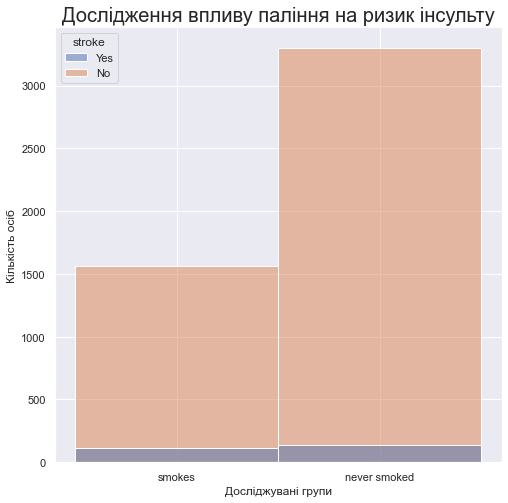

In [47]:
fig, axes = plt.subplots(figsize=(8, 8))

sns.histplot(data = smoker_tabl, x= 'Int_Smoking_status2', hue = 'stroke')

axes.set(xlabel='Досліджувані групи', ylabel='Кількість осіб')
axes.set_title('Дослідження впливу паління на ризик інсульту', fontsize=20)

plt.show()

In [48]:
# form_smok_str_1 = data[(data['smoking_status'] == 'formerly smoked')&(data['stroke'] == 1)]
# form_smok_summa = data[(data['smoking_status'] == 'formerly smoked')]
# form_smok_res = correl_group(form_smok_str_1, form_smok_summa)

# nev_smok_str_1 = data[(data['smoking_status'] == 'never smoked')&(data['stroke'] == 1)]
# nev_smok_summa = data[(data['smoking_status'] == 'never smoked')]
# nev_smok_res = correl_group(nev_smok_str_1, nev_smok_summa)

# smok_str_1 = data[(data['smoking_status'] == 'smokes')&(data['stroke'] == 1)]
# smok_summa = data[(data['smoking_status'] == 'smokes')]
# smok_res = correl_group(smok_str_1, smok_summa)

# Unknow_str_1 = data_modif[(data_modif['Int_Smoking_status'] == 0)&(data_modif['stroke'] == 1)]
# Unknow_summa = data_modif[(data['Int_Smoking_status'] == 0)]
# Unknow_res = np.round(len(Unknow_str_1) / len(Unknow_summa) * 100, 2)

# Unknow_str_2 = data_modif[(data_modif['Int_Smoking_status'] == 1)&(data_modif['stroke'] == 1)]
# Unknow_summa2 = data_modif[(data['Int_Smoking_status'] == 1)]
# Unknow_res2 = np.round(len(Unknow_str_2) / len(Unknow_summa2) * 100, 2)
# # print(f'Отримані результати вказують на те, що загалом чоловіки мають менший шанс інсульту {res}%, серед досліджуваних осіб.')
# print(nev_smok_res, form_smok_res, smok_res)
# # print(len(nev_smok_str_1), len(form_smok_str_1), len(smok_str_1), len(Unknow_res))

# print(Unknow_res, Unknow_res2)

#гіпотеза 3 
Not_Smokers = data[(data['stroke'] == 1)&(data['smoking_status'] == 'never smoked')]
peple_stroke = data[(data['stroke'] == 1)]

Smokers = len(peple_stroke) - len(Not_Smokers)
res_smok_stroke = np.round(Smokers/len(peple_stroke)*100)
res_non_smok_stroke = 100 - res_smok_stroke


print(f'Oтримані результати, як графічні так і математичні, свідчать що люди які курять мають у {np.round(res_smok_stroke/res_non_smok_stroke, 1)} раз більший ризик інсульту.')

Oтримані результати, як графічні так і математичні, свідчать що люди які курять мають у 1.8 раз більший ризик інсульту.


6)Дослідження наявності гіпертензії та серцевих захворювань на винекнення інсульту

In [49]:
data_heart_probl = data[['stroke', 'age', 'hypertension', 'heart_disease', 'Residence_type',]].copy()
data_heart_probl['stroke'] = np.where(data_heart_probl['stroke'] == 0, 'No', 'Yes')
#для кращої візуалізації заміним 0, 1 на Ні, Так в колонці інсульт

In [50]:
data_heart_probl['hypertension1'] = np.where(data_heart_probl['hypertension'] == 0, 'No', 'Yes')
data_heart_probl['heart_disease1'] = np.where(data_heart_probl['heart_disease'] == 0, 'No', 'Yes')

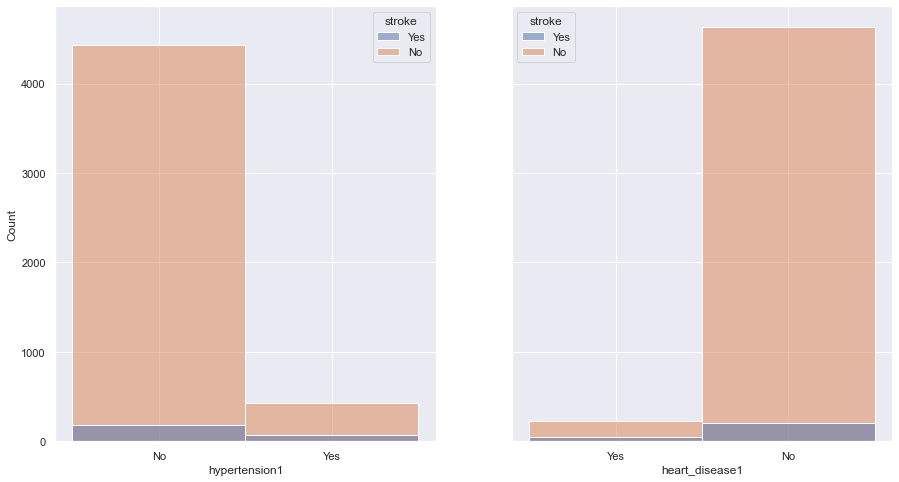

In [51]:
fig, axes = plt.subplots(1, 2, sharey = True, figsize=(15, 8))

sns.histplot(data = data_heart_probl, x= 'hypertension1', hue = 'stroke', ax = axes[0])
sns.histplot(data = data_heart_probl, x= 'heart_disease1', hue = 'stroke', ax = axes[1])

# axes.set(xlabel='Досліджувані групи розподілені за наявністю інсульту', ylabel='Кількість осіб')
# axes.set_title('Дослідження впливу гіпертонії та серцевих хвороб на ризик інсульту', fontsize=20)



plt.show()

In [52]:
ABC = data_heart_probl[(data_heart_probl['stroke']=='Yes')&(data_heart_probl['age'] >= 35)]

ABC1 = ABC.sort_values(by=['heart_disease1'])

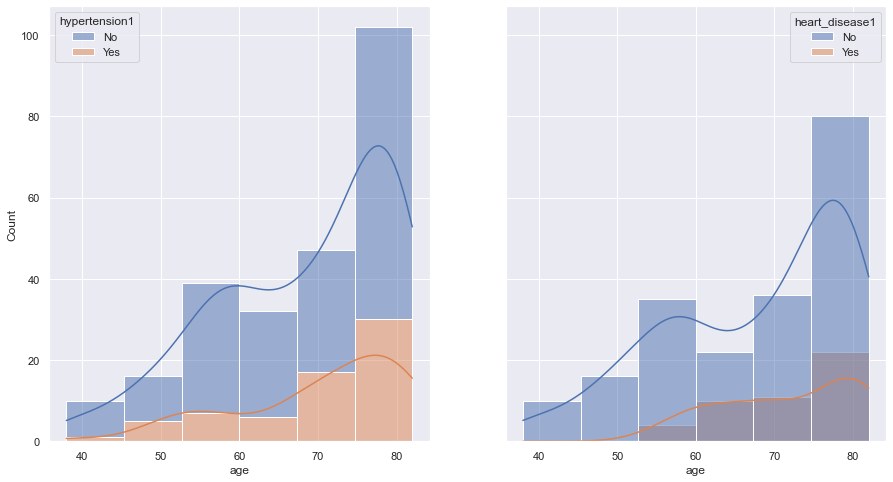

In [53]:
fig, axes = plt.subplots(1, 2, sharey = True, figsize=(15, 8))

a = 6
sns.histplot(data = ABC, x= 'age', hue = 'hypertension1', ax = axes[0], kde = True, multiple="stack", bins = a)
sns.histplot(data = ABC1, x= 'age', hue = 'heart_disease1', ax = axes[1], kde = True, bins = a)

# axes.set(xlabel='Досліджувані групи', ylabel='Кількість осіб')
# axes.set_title('Дослідження впливу паління на ризик інсульту', fontsize=20)

plt.show()

In [54]:
hypert_1 = data_heart_probl[(data_heart_probl['hypertension']==1)&(data_heart_probl['stroke']=='Yes')]
heart_dis_1 = data_heart_probl[(data_heart_probl['heart_disease']==1)&(data_heart_probl['stroke']=='Yes')]

Str_summa = data_heart_probl[(data_heart_probl['stroke']=='Yes')]

res_hypert = correl_group(hypert_1, Str_summa)
res_heart_dis = correl_group(heart_dis_1, Str_summa)

print(f'Отримані результати свідчать що серед людей з гіпертонією у {res_hypert}% (в кожного 4го) був інсульт,')
print(f'серед людей з серцевими захворюваннями інсульт був у {res_heart_dis}%(~в кожного 5го)')
print()
print(f'Відмічено що це вікові хвороби і з віком y пацієнтів зростає ймовірність їх отримати')

Отримані результати свідчать що серед людей з гіпертонією у 26.51% (в кожного 4го) був інсульт,
серед людей з серцевими захворюваннями інсульт був у 18.88%(~в кожного 5го)

Відмічено що це вікові хвороби і з віком y пацієнтів зростає ймовірність їх отримати
